# Сборный проект-1. Анализ игровой индустрии

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План исследования

### 1.Предобработка данных
    - Посмотрим общую информацию о данных
    - Сделаем предварительные выводы
    - Заменим названия столбцов (приведите к нижнему регистру)
    - Определим и заполним пропущенные значения
    - Поищем аномалии
    - Изменим типы данных
    - Удалим дубликаты и отфильтруем не нужные столбцы
### 2 .Посчитаем и добавим в таблицу:
    - Суммарные продажи во всех регионах и запишите их в отдельный столбец.

### 3. Проанализируем данные: 

    - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
    - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - Не учитывайте в работе данные за предыдущие годы.
    - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    - Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
    - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    - Соотнесите выводы с продажами игр на других платформах.
    - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### 4. Составим портрет пользователя каждого региона:
Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


### 5. Проверим гипотезы:  
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

### 6. Общий вывод


### 1.Предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Путь к файлу: /datasets/games.csv
games = pd.read_csv('/datasets/games.csv')

### Описание данных   

•	Name — название игры  
•	Platform — платформа  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	NA_sales — продажи в Северной Америке (миллионы долларов)  
•	EU_sales — продажи в Европе (миллионы долларов)  
•	JP_sales — продажи в Японии (миллионы долларов)  
•	Other_sales — продажи в других странах (миллионы долларов)  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Присутствует пропуски, особенно большое количество в оценках и рейтинге.  
Также отметим тип данных object в столбце User_Score, вероятно те самые tbd.  

tbd - To Be Determined, то есть "Будет определено". Фактически в данном случае яляется аналогом NaN.  
Ссылка на инфу: https://autogear.ru/article/171/345/tbd---chto-znachit-eto-sokraschenie/

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [6]:
# Количество игр в датасете
len(games['Name'].unique())

11560

In [7]:
# Платформы
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
# Жанры
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
# Оценки игроков. Много значений tbd
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.6       2
2.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [10]:
# Возрастной рейтинг
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Явно аномальные значения отсутствуют.

In [11]:
# Проверим сразу на дубликаты
games.duplicated().sum()

0

**Заменим названия столбцов (приведите к нижнему регистру)**

In [12]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [13]:
games.columns = games.columns.str.lower()

In [14]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработаем пропуски

In [15]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [16]:
games.isnull().sum().sort_values(ascending = False) / games.shape[0] * 100

critic_score      51.32
rating            40.48
user_score        40.09
year_of_release    1.61
genre              0.01
name               0.01
other_sales        0.00
jp_sales           0.00
eu_sales           0.00
na_sales           0.00
platform           0.00
dtype: float64

**name - название игры и genre - жанр**  
2 пропуска

In [17]:
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Нет почти никакой информации по этим играм.  
Заполнить эти пропуски не получится - удаляем.

In [18]:
# Удалим пропуски. 
games = games.dropna(subset=['name'])

**year_of_release - год выпуска**  
269 пропусков - 1.6% датасета

In [19]:
games.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,nan,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,nan,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,nan,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,nan,Adventure,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [20]:
games.query("name == 'FIFA Soccer 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
2606,FIFA Soccer 2004,XB,"2,003.00",Sports,0.24,0.49,0.00,0.05,82.00,8.2,E
12029,FIFA Soccer 2004,GC,"2,003.00",Sports,0.05,0.01,0.00,0.00,83.00,6.2,E
13086,FIFA Soccer 2004,GBA,"2,003.00",Sports,0.04,0.01,0.00,0.00,82.00,7.9,E


Видим, что есть пропуски на отдельной платформе.  
Бывает, что игры на разных платформах выходят не одновременно, но это скорее исключение.  
Попробуем заполнить пропуски по данным выхода игры на другой платформе.  

In [21]:
not_null_years = games[games['year_of_release'].notnull()]
not_null_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [22]:
col = 'year_of_release'

In [23]:
# Функция для замены пропусков
def fill(row, **kwargs):
    fill_col = col
    rows = not_null_years[not_null_years['name'] == row['name']]
    if len(rows) > 0:
        return rows.iloc[0][fill_col]
    return row[fill_col]

In [24]:
games.loc[games['year_of_release'].isnull(),'year_of_release'] = games.apply(fill, axis=1)

In [25]:
# Проверим замену
games.query("name == 'FIFA Soccer 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,"2,003.00",Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
2606,FIFA Soccer 2004,XB,"2,003.00",Sports,0.24,0.49,0.00,0.05,82.00,8.2,E
12029,FIFA Soccer 2004,GC,"2,003.00",Sports,0.05,0.01,0.00,0.00,83.00,6.2,E
13086,FIFA Soccer 2004,GBA,"2,003.00",Sports,0.04,0.01,0.00,0.00,82.00,7.9,E


In [26]:
len(games.query('year_of_release.isnull()'))

146

Часть пропусков заполнено, остальные заменим на маркер "-1".

In [27]:
games['year_of_release'] = games['year_of_release'].fillna(-1)

**critic_score и user_score. Оценки критиков и пользователей**  
critic_score 8578 пропусков - 51% от датасета  
user_score 6701 пропусков - 40% от датасета

Заполнять по аналогии с годом выпуска будет некорректно, так как оценки на разных платформах могут отличаться.  
Варианты с медианой также не подходят, слишком много пропусков.

In [28]:
games.query('critic_score.isnull() and user_score.isnull() and rating.isnull()').sort_values(by = 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,"2,016.00",Role-Playing,0.00,0.00,0.03,0.00,nan,NaN,NaN
1079,Fire Emblem Fates,3DS,"2,015.00",Role-Playing,0.81,0.23,0.52,0.11,nan,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,"2,013.00",Platform,0.27,0.27,0.00,0.05,nan,NaN,NaN
3862,Frozen: Olaf's Quest,DS,"2,013.00",Platform,0.21,0.26,0.00,0.04,nan,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,"2,016.00",Adventure,0.00,0.00,0.04,0.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16389,ef - a fairy tale of the two.,PS2,"2,010.00",Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
12190,everGirl,GBA,"2,005.00",Adventure,0.05,0.02,0.00,0.00,nan,NaN,NaN
16511,th!nk Logic Trainer,Wii,"2,009.00",Puzzle,0.01,0.00,0.00,0.00,nan,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,-1.00,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN


In [29]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,nan,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,nan,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1.00,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,nan,tbd,E


Корректно заполнить эти пропуски не получится, поэтому:  
1) заменим tbd на nan  
2) заменим пропуски на маркеры "-1"

In [30]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

In [31]:
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)

**rating - возрастной рейтинг**  
rating 6766 пропусков - пропусков 40% от датасета

Часть пропусков попробуем заполнить по аналогии с годом выпуска.

In [32]:
not_null_rating = games[games['rating'].notnull()]
not_null_rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,-1,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,-1,E
16702,STORM: Frontline Nation,PC,"2,011.00",Strategy,0.00,0.01,0.00,0.00,60.00,7.2,E10+
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,-1.00,-1,E


In [33]:
col = 'rating'

In [34]:
def fill(row, **kwargs):
    fill_col = col
    rows = not_null_rating[not_null_rating['name'] == row['name']]
    if len(rows) > 0:
        return rows.iloc[0][fill_col]
    return row[fill_col]

In [35]:
games.loc[games['rating'].isnull(),'rating'] = games.apply(fill, axis=1)

In [36]:
len(games.query('rating.isnull()'))

6327

Часть пропусков заполнили, остальное заполняем маркером "Unknown".

In [37]:
games['rating'] = games['rating'].fillna('Unknown')

In [38]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски заполнены, ещё раз выделим наши **маркеры**:

In [39]:
year_of_release_mark = 'year_of_release != -1'
critic_score_mark = 'critic_score != -1'
user_score_mark = 'user_score != -1'
rating_mark = 'rating != "Unknown"'

### Преобразуем типы данных

In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null object
rating             16713 non-null object
dtypes: float64(6), object(5)
memory usage: 2.2+ MB


In [41]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')

In [42]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null Int64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 2.2+ MB


In [43]:
games.duplicated().sum()

0

Предобработка данных выполнена.

### 2 .Посчитаем и добавим в таблицу:
- Суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [44]:
games['total_sales'] = games.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,111.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.00,Unknown,43.82
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.00,Unknown,40.27


### 3. Проанализируем данные: 

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [45]:
games_per_year = games.query(year_of_release_mark)
games_per_year = (
    games_per_year[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

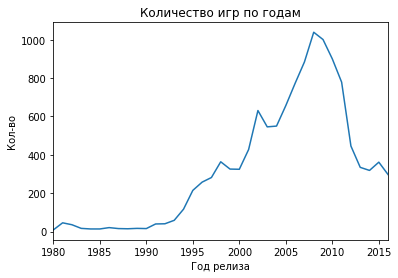

In [46]:
(
    games_per_year
        .plot(legend=False,title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()

Рост продаж начался в 1995 году. Это логично, так как примерно в это время начали появляться персональные компьютеры и игровые консоли.  
С 2010 года наблюдается спад, могу это связать с тем, что у нас отсутствуют данные по самому популярному сейчас сегменту - это MMORPG,MMOBA, Survival а также нет данных по играм на мобильниках.  
Рассматривать совсем старые игры нецелесообразно, возьмём последний период в 5-10 лет.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [47]:
total_sales_per_platform = (games.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )

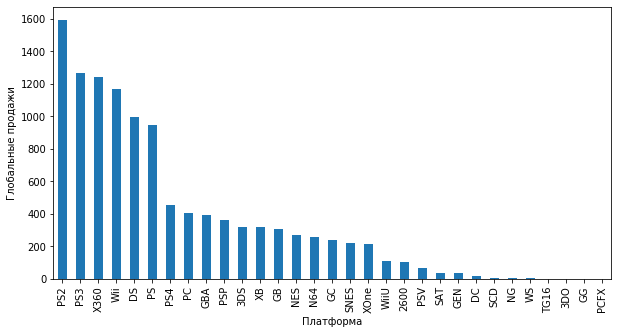

In [48]:
(total_sales_per_platform.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

Лидируют 6 платформ с большим отрывом, построим по ним распределение по годам.

In [49]:
top_6_alltime = total_sales_per_platform.head(6)['platform'].tolist()
top_6_alltime

['PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS']

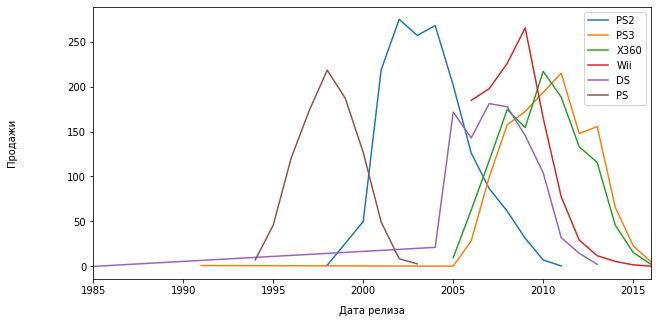

In [50]:
for name in top_6_alltime:
    games.query('platform == @name and year_of_release != -1').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (10, 5), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

По графику видим, что платформа появляется и исчезает в течение примерно **10 лет**.  
Таким образом для нашего прогноза целесообразно рассмотреть период за последние **5 лет**, т.е те платформы которые набирают популярность, либо находятся на пике.

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ**

In [51]:
actual_platforms = games.query('year_of_release >= 2012')
actual_platforms_search = (actual_platforms.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )
actual_platforms_search

,platform,total_sales
4,PS4,455.23
3,PS3,396.98
9,X360,312.41
0,3DS,237.84
10,XOne,210.91
8,WiiU,107.32
2,PC,101.89
6,PSV,60.54
7,Wii,48.94
1,DS,16.99


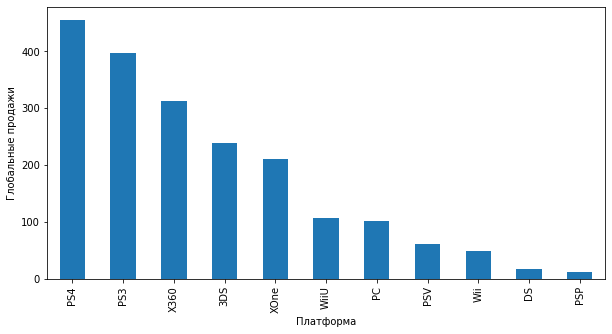

In [52]:
(actual_platforms_search.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

In [53]:
top_now = actual_platforms_search['platform'].tolist()
top_now

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

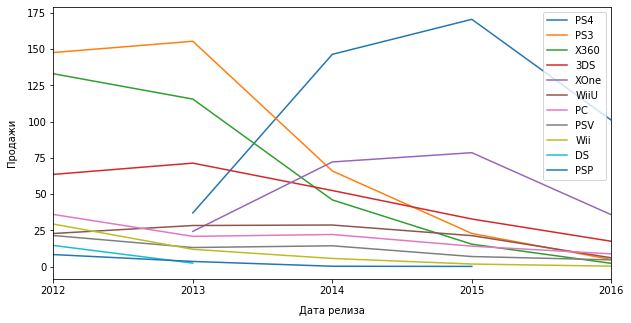

In [54]:
for name in top_now:
    actual_platforms.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize=(10, 5), label = name)
    
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

Продажи падают на всех платформах.  
Неплохие продажи показывают только PS4 от Sony и XOne от Microsoft.

In [55]:
promising_platforms = actual_platforms.query('platform == "PS4" or platform == "XOne"')
promising_platforms_stats = (promising_platforms.groupby(['platform','year_of_release'],as_index = False)['total_sales'].sum()
                                 .sort_values('platform',ascending = False)
                           )
promising_platforms_stats

,platform,year_of_release,total_sales
4,XOne,2013,24.30
5,XOne,2014,72.22
6,XOne,2015,78.61
7,XOne,2016,35.78
0,PS4,2013,37.04
1,PS4,2014,146.50
2,PS4,2015,170.66
3,PS4,2016,101.03


Итак для дальнейшего исследования оставляем **PS4 от Sony и XOne от Microsoft**

**Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.**

[(0, 5)]

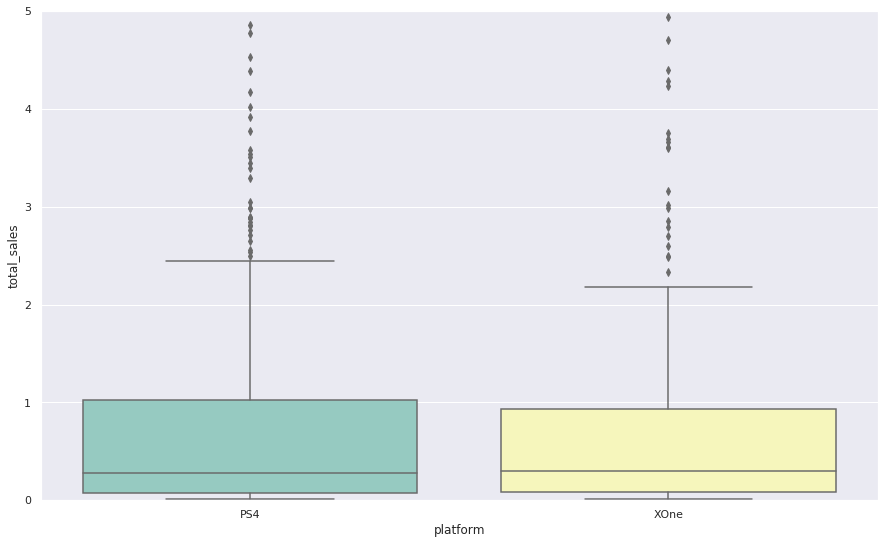

In [56]:
sns.set(rc={'figure.figsize':(15,9)}) # здесь я настраиваю размер самого графика в jupyter
ax = sns.boxplot(x="platform", y="total_sales", data= promising_platforms, palette="Set3")
ax.set(ylim=(0,5))

In [57]:
promising_platforms_mean_median_sale = (promising_platforms.pivot_table(index = 'platform'
                                                                 ,values='total_sales'
                                                                 ,aggfunc = ['mean','median']) 
                                )
promising_platforms_mean_median_sale

,mean,median
,total_sales,total_sales
platform,,
PS4,1.16,0.28
XOne,0.85,0.30


Видим, что в среднем одна игра выпущенная на платформе приносит порядка 1 млн долларов.    
Однако много игр, которые почти не принесли прибыль и наоборот есть суперхиты вроде ГТА которые приносят больше 5млн долларов. 
Поэтому более корректно обратить внимание на медианное значение в **300 тыс. долларов**.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [58]:
ps4 = promising_platforms.query("platform == 'PS4'")
xone = promising_platforms.query("platform == 'XOne'")

In [59]:
ps4_f = ps4.query(f"{critic_score_mark and user_score_mark}")

In [60]:
features = ['user_score', 'critic_score', 'total_sales']

cmap=sns.diverging_palette(240, 10, as_cmap=True)
ps4_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,total_sales
user_score,1,0.39,-0.038
critic_score,0.39,1,0.34
total_sales,-0.038,0.34,1


In [61]:
xone_f = xone.query(f"{critic_score_mark and user_score_mark}")

In [62]:
xone_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,total_sales
user_score,1,0.25,-0.067
critic_score,0.25,1,0.34
total_sales,-0.067,0.34,1


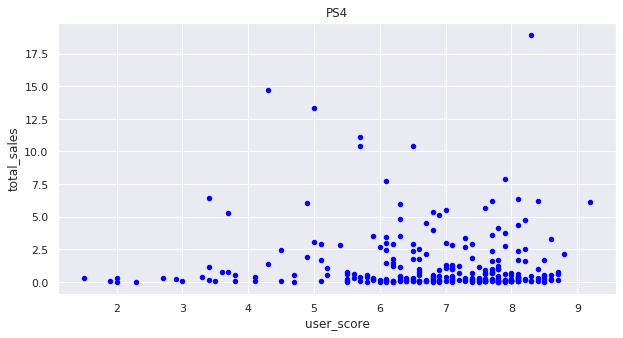

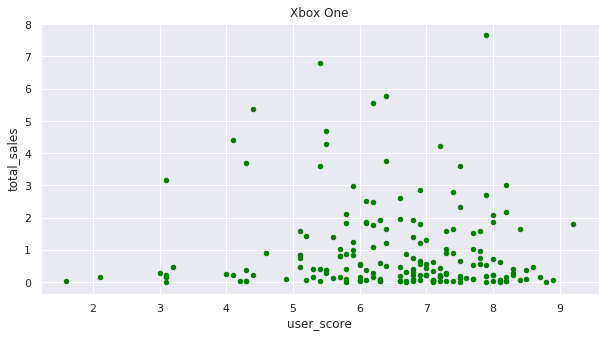

In [63]:
ps4_f.plot(x='user_score', y='total_sales', kind='scatter', title='PS4',figsize=(10, 5), color='blue')
xone_f.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One',figsize=(10, 5), color='green')
plt.show()

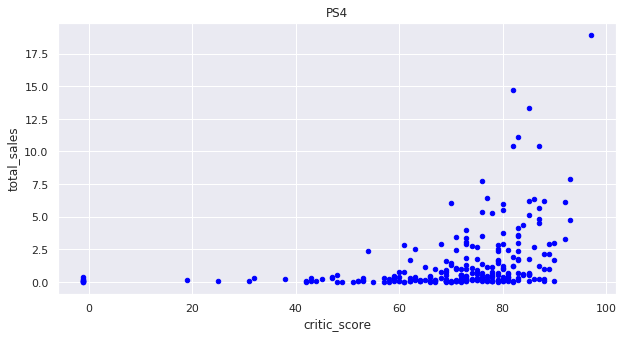

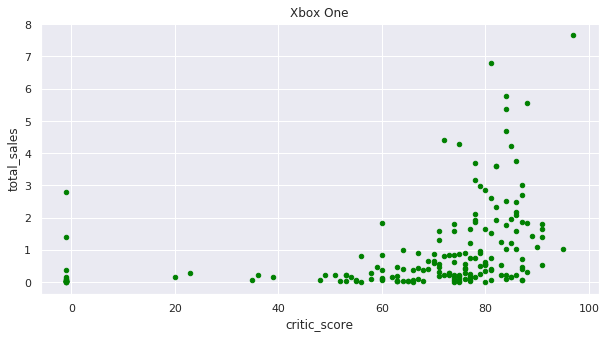

In [64]:
ps4_f.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4',figsize=(10, 5), color='blue')
xone_f.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One',figsize=(10, 5), color='green')
plt.show()

- Взаимосвязи между отзывами пользователей и продажами нет.  
- Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая.  

Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр.

In [65]:
promising_platforms.query('critic_score > 90')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,18.93
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.90,M,7.66
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.90,T,7.89
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92,9.20,M,6.10
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93,8.20,M,4.78
623,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92,8.60,M,3.29
1499,The Witcher 3: Wild Hunt,XOne,2015,Role-Playing,0.69,0.50,0.00,0.11,91,9.20,M,1.80
1904,Forza Horizon 3,XOne,2016,Racing,0.42,0.58,0.00,0.08,91,7.40,E,1.66
1948,Overwatch,XOne,2016,Shooter,0.63,0.33,0.00,0.10,91,5.60,T,1.39
2720,Metal Gear Solid V: The Phantom Pain,XOne,2015,Action,0.41,0.26,0.01,0.07,95,7.30,M,1.01


In [66]:
a1 = (ps4[['name','platform','total_sales']].sort_values(by ='total_sales',ascending = False)
                                            .rename(columns={'total_sales':'ps4_total_sales'}).head(10)
     )
a2 =(xone[['name','platform','total_sales']].sort_values(by ='total_sales',ascending = False)
                                            .rename(columns={'total_sales':'xone_total_sales'}).head(10).head(10)
    )
aj = a1.merge(a2, on='name', how='outer')
aj

,name,platform_x,ps4_total_sales,platform_y,xone_total_sales
0,Call of Duty: Black Ops 3,PS4,20.49,XOne,9.50
1,Grand Theft Auto V,PS4,18.93,XOne,7.66
2,FIFA 16,PS4,14.70,XOne,5.37
3,FIFA 17,PS4,13.35,XOne,4.70
4,Star Wars Battlefront (2015),PS4,11.47,XOne,4.94
5,Call of Duty: Advanced Warfare,PS4,11.14,XOne,6.81
6,Fallout 4,PS4,10.44,XOne,5.54
7,FIFA 15,PS4,10.41,NaN,nan
8,Uncharted 4: A Thief's End,PS4,7.89,NaN,nan
9,Destiny,PS4,7.71,XOne,4.29


In [67]:
games.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,30.14
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,21.41
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,18.93
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.90,M,7.66
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96,7.90,M,1.86


Обратим внимание, что хиты вроде GTA5 находятся в топе по продажам на обоих платформах и суммарная прибыль приближается к 100 млн долларов.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

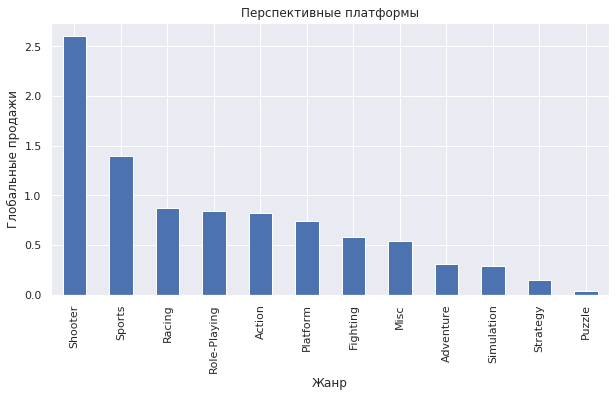

In [68]:
(promising_platforms
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Перспективные платформы')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

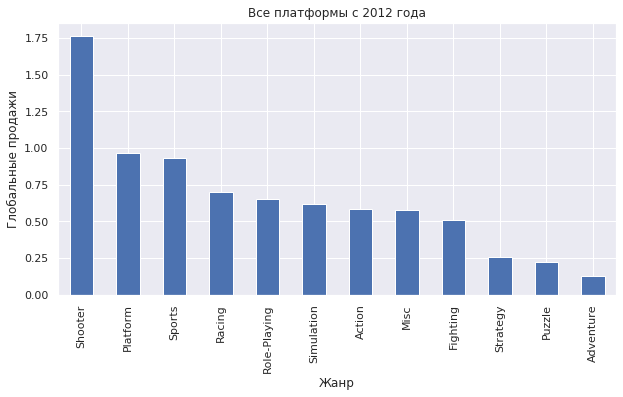

In [69]:
(actual_platforms
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Самые популярные жанры ожидаемо - шутеры, спорт, гонки и рпг.
Хуже всего продаются стратегии и квесты.  

Если брать все платформы, то также популярен жанр "платформеры".  
Далее рассмотрим более подробно в разрезе регионов.

### 4. Составим портрет пользователя каждого региона:
Определите для пользователя каждого региона (NA, EU, JP):

In [70]:
regions_list = ['na_sales','eu_sales','jp_sales']

In [71]:
print(actual_platforms[regions_list].sum())

na_sales   593.30
eu_sales   509.18
jp_sales   192.82
dtype: float64


Отметим, что суммарный объём продаж в Японии более чем в 2.5 раза меньше Европы и Америки.

**Самые популярные платформы (топ-5)**

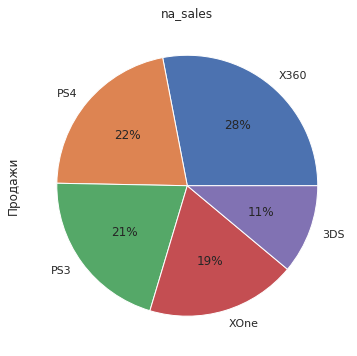

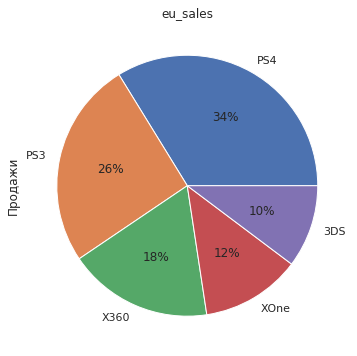

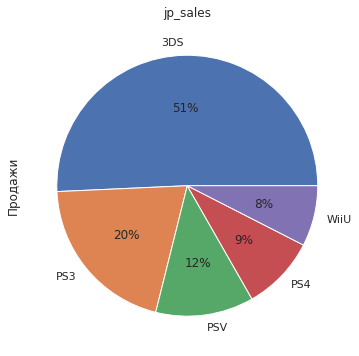

In [72]:
for region in regions_list:
    (actual_platforms.pivot_table(index='platform', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

В Европе и Америке лидируют PS и Xbox.  
В Японии с 50% рынка занимает их портативная консоль 3DS.  

**Самые популярные жанры (топ-5)**

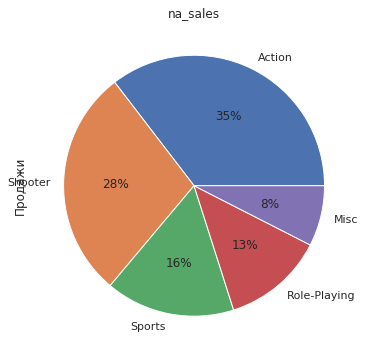

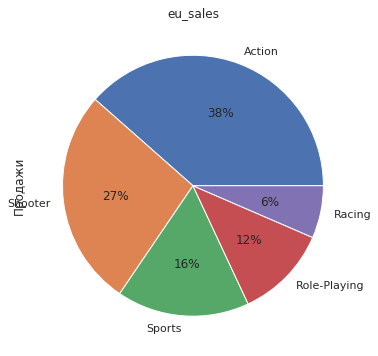

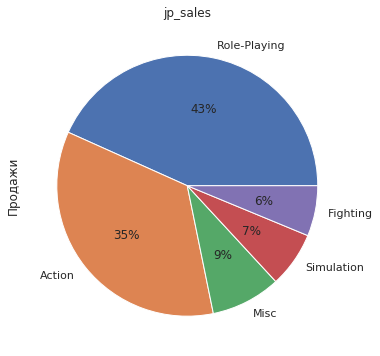

In [73]:
for region in regions_list:
    (actual_platforms.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

В Европе и Америке популярны жанры Action,Shooter и Sports.  
Япония любит РПГ и Action.  

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

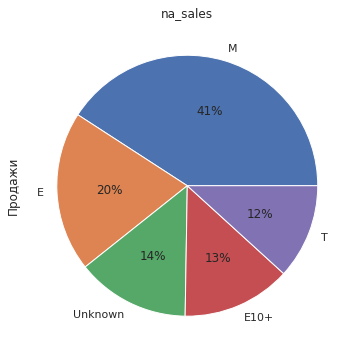

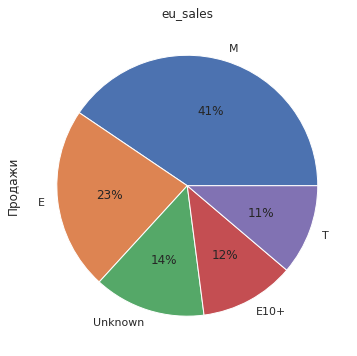

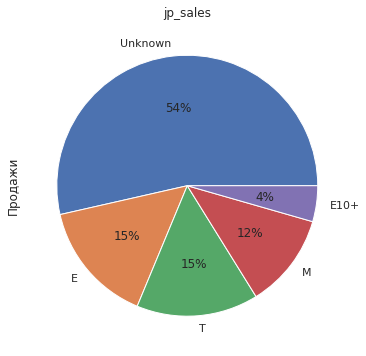

In [74]:
# Не будем убирать флаг
for region in regions_list:
    (actual_platforms.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

Снова похожая ситуация для Европы и Америки - хорошо продаются игры с рейтингом для взрослых и для всех.  
В Японии много продаж по играм с неизвестным рейтингом и рейтингом для всех.

**Вывод**  
Портреты пользователей из Европы и Америки схожи.  
Лидируют платформы PS и Xbox, жанры Action,Shooter и Sports, игры с рейтингом для взрослых и для всех.  

У пользователей из Японии свои предпочтения.  
Лидирует консоль 3DS, жанры РПГ и Action, игры с неизвестным рейтингом и рейтингом для всех.

### 5. Проверим гипотезы:  
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [75]:
xone = actual_platforms.query("platform == 'XOne' and user_score != -1")
pc = actual_platforms.query("platform == 'PC' and user_score != -1")

print("Дисперсия выборки xone",np.var(xone['user_score']))
print("Дисперсия выборки pc",np.var(pc['user_score']))

Дисперсия выборки xone 1.8965188383045526
Дисперсия выборки pc 2.734138496439882


In [76]:
alpha = .05

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False  # Welch’s t-test, который не предполагает равенство дисперсий
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


In [77]:
xone['user_score'].mean()

6.521428571428572

In [78]:
pc['user_score'].mean()

6.4454976303317535

Полученное значение p-value говорит о том, что хотя средние рейтинги платформ Xbox One и PC незначительно отличаются, с вероятностью в почти 62% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.  
Таким образом, рейтинги платформ Xbox One и PC одинаковые и наша гипотеза **подтвердилась**.

**Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные**  
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [79]:
action = actual_platforms.query("genre == 'Action' and user_score != -1")
sport = actual_platforms.query("genre == 'Sports' and user_score != -1")

print("Дисперсия выборки action",np.var(action['user_score']))
print("Дисперсия выборки sport",np.var(sport['user_score']))

Дисперсия выборки action 1.8783732502012689
Дисперсия выборки sport 3.0073882971729127


In [80]:
alpha = .05

results = st.ttest_ind(
    action['user_score'],
    sport['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.337200239591976e-20
Отвергаем нулевую гипотезу


In [81]:
action['user_score'].mean()

6.834274952919021

In [82]:
sport['user_score'].mean()

5.455897435897437

Средние пользовательские рейтинги жанров Action и Sports различаются. Вероятность случайно получить такое отличие крайне мала.
Следовательно, cредние пользовательские рейтинги жанров Action и Sports действительно различаются и наша гипотеза **подтвердилась**.

### 6. Общий вывод

- С 2010 года наблюдается спад продаж в игровой индустрии.
- Платформы появляются и умирают в течение 10 лет.
- Наиболее популярные и перспективные на данный момент платформы – это Sony PlayStation 4 и Xbox One.
- В среднем одна игра выпущенная на платформе приносит прибыль около 300 тысяч долларов, но есть хиты как ГТА5 которые находятся в топе продаж на всех представленных платформах и суммарная прибыль приближается к 100 млн. долларов.
- В США и Европе лучше всего продаются шутеры и экшены.
- Больше всего продаж приходится на игры с рейтингом для взрослых и для всех.
- Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Объём продаж в этой стране в 2.5 раза меньше покаталей Европы и Америки.

Потенциально выгодно разработать игру для рынка Европы и Америки на перспективных платформах Sony PlayStation 4 и Xbox One в жанре Shooter/Action.
Японский рынок имеет свою специфику по платформам и жанрам, кроме того не слишком обширен.

Дополнительно стоит ещё раз отметить, что у нас отсутствуют данные по самому популярному сейчас сегменту игр - это MMORPG,MMOBA, Survival а также нет данных по играм на мобильниках. Оффлайн игры уходят в прошлое.  
Онлайн игры распространяются по модели ФТП, либо месячной подписки и обычно имеют "донат", который приносит прибыль.
Весьма вероятно по этой причине платформа PC не попадает в разряд перспективных, также может влиять фактор "пиратства".

В качестве релевантности результатов исследования даже на 2019:
https://ru.wikipedia.org/wiki/2019_%D0%B3%D0%BE%D0%B4_%D0%B2_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80%D0%B0%D1%85
Основные платформы PS4, XOne, Win(PC).